In [137]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [3]:
from dbcp.extract.nrel_wind_solar_ordinances import extract

/app/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
import dbcp.transform.nrel_wind_solar_ordinances as nrel

In [72]:
from pathlib import Path
import pandas as pd
import numpy as np

In [6]:
path_wind = Path("/app/data/raw/NREL_Wind_Ordinances.xlsx")
path_solar = Path("/app/data/raw/NREL_Solar_Ordinances.xlsx")
assert path_wind.exists()
assert path_solar.exists()

In [8]:
raw_wind = extract(path_wind, "wind")
raw_solar = extract(path_solar, "solar")

/app/.local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [9]:
raw_wind.keys()

dict_keys(['nrel_state_wind_ordinances', 'nrel_local_wind_ordinances'])

In [10]:
raw_wind['nrel_local_wind_ordinances'].sample(5)

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
1053,Nebraska,NaN,Clay,Water,Meters,304.5,Clay County Zoning Regs. § 1304,1000' setback to USFW designated wetlands type...,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
1049,Nebraska,NaN,Cherry,Water,Meters,182.88,Cherry County Zoning Regs. § 613,NaN,NaN,NaN,NaN,2016.0,2022.0,NaN,NaN
1069,Nebraska,NaN,Dawson,Roads,Max tip-height Multiplier,1.5,Dawson County Zoning Regs. § 6.06.05,NaN,NaN,NaN,NaN,2019.0,2022.0,NaN,NaN
1031,Nebraska,NaN,Brown,Property Line,Meters,1609.34,Brown County Zoning Regs. § 6.56,1 mile setback,NaN,NaN,NaN,2020.0,2022.0,NaN,NaN
1825,Wyoming,NaN,Sweetwater,Property Line,Max tip-height Multiplier,1.5,Section 17. Wind Energy Conversion Systems,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [11]:
raw_wind['nrel_state_wind_ordinances'].sample(5)

,State,Feature Type,Value Type,Value,Comment,Citation,Ordinance Year,Year Captured,Unnamed: 8,Unnamed: 9
10,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Minnesota,Roads,Meters,76.2,NaN,NaN,NaN,2018.0,NaN,NaN
44,South Dakota,Property Line,Max tip-height multiplier,1.1,"Minimum set back for towers > 75' high, can be...",S.D. Codified Law § 43-13-24,2009.0,2022.0,NaN,NaN
27,Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
raw_solar['nrel_local_solar_ordinances'].sample(5)

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
607,North Carolina,NaN,Moore,Property Line,Meters,15.24,Moore County Unified Dev. Ord. § 8.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,Nebraska,NaN,Kearney,Property Line,Meters,45.72,Kearney County Zoning Regs. § 7.42.12,150' setback,NaN,NaN,NaN,2018.0,2018.0,NaN,NaN
226,Indiana,NaN,Clinton,Property Line,Meters,15.24,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,Nebraska,NaN,Pierce,Property Line,Meters,9.144,Pierce County Zoning Regs. § 6.04.01,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN
333,Kansas,NaN,Finney,Property Line,Meters,15.24,Finney County Zoning Ordinance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
raw_solar['nrel_state_solar_ordinances'].dropna(thresh=2)  #df is mostly NaN

,State,Feature Type,Value Type,Value,Comment,Citation,Ordinance Year,Year Captured
45,Vermont,Highways,Meters,30.48,NaN,Vermont Rev. Stat. Ann. § tit. 30 § 248(s),2022.0,2022.0
46,Vermont,Property Line,Meters,15.24,NaN,Vermont Rev. Stat. Ann. § tit. 30 § 248(s),2022.0,2022.0


In [20]:
wind = raw_wind['nrel_local_wind_ordinances']
solar = raw_solar['nrel_local_solar_ordinances']

In [32]:
test = wind.loc[wind['Value'].str.contains('\+').fillna(False),:].copy()

In [33]:
nrel._convert_linear_expr_to_constant(test["Value"].copy())

102     158.62
738     166.24
757     166.24
770     166.24
772     166.24
778     173.86
779     163.19
795     166.24
807     166.24
808     166.24
821     173.86
823     163.19
1242    181.48
1243    332.48
1244    483.48
1278    302.70
1423    173.86
1424    173.86
1433    173.86
1434    173.86
1441    173.86
1442    173.86
dtype: float64

In [34]:
nrel._replace_linear_definitions_with_constants(test.loc[:, "Value"], test.loc[:, 'Value Type'])

In [35]:
test

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
102,Colorado,NaN,Elbert,Property Line,Max tip-height Multiplier,158.62,Elbert County Zoning Regulations Art. 5 § 26,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
738,Kansas,NaN,Crawford,Roads,Max tip-height Multiplier,166.24,Crawford County Zoning Art. 16,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
757,Kansas,NaN,Geary,Roads,Max tip-height Multiplier,166.24,Geary County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
770,Kansas,NaN,Jefferson,Roads,Max tip-height Multiplier,166.24,Jefferson County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
772,Kansas,NaN,Kearny,Roads,Max tip-height Multiplier,166.24,Kearny County Zoning Ordinance,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
778,Kansas,NaN,Lyon,Roads,Max tip-height Multiplier,173.86,Lyon County Wind Energy Ordinance Art. 8 Sec. 808,NaN,Max tip Height Multiplier + ft,22.86,Changed from 22.86 Meters to one times the WEC...,2008.0,2018.0,2022.0,Changed
779,Kansas,NaN,Lyon,Transmission,Max tip-height Multiplier,163.19,Lyon County Wind Energy Ordinance Art. 8 Sec. 808,NaN,NaN,NaN,NaN,2008.0,2022.0,NaN,NaN
795,Kansas,NaN,Osage,Roads,Max tip-height Multiplier,166.24,Osage County Wind Energy Ordinance Sec 11-102(5),NaN,NaN,NaN,NaN,2010.0,2022.0,NaN,NaN
807,Kansas,NaN,Reno,Property Line,Max tip-height Multiplier,166.24,Reno County Zoning Ordinance Art. 23 CWECS Reg...,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
808,Kansas,NaN,Reno,Roads,Max tip-height Multiplier,166.24,Reno County Zoning Ordinance Art. 23 CWECS Reg...,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [36]:
nrel._format_column_names(test.columns)

['state',
 'city_or_town',
 'county',
 'feature_type',
 'value_type',
 'value',
 'citation',
 'comment',
 'updated_type',
 'updated_value',
 'updated_comment',
 'ordinance_year',
 'original_captured_date',
 'new_capture_date',
 'update_status']

In [ ]:
test = (solar.loc[solar['Value'].str.contains('/|-').fillna(False), :]).copy()

In [ ]:
nrel._replace_multivalued_with_worst_case(test.loc[:,"Value"], test.loc[:, "Value Type"])

In [ ]:
test

## Set membership

In [69]:
simple = solar['Value Type'].str.lower().str.strip()

In [52]:
is_water = simple.str.contains('river|lake|wetland|waters')
simple.loc[is_water] = 'water'

In [65]:
simple.replace({
        "meter": "meters",
        "turbine count": "turbines",
        "rotor diameter mutliplier": "rotor diameter multiplier",
        "max tip height": "max tip height multiplier",
        

    }, inplace=True)

In [70]:
simple.value_counts(dropna=False)

meters                                 706
acres                                   71
dba                                     36
maximum structure height                 9
percentage                               9
n/a                                      2
NaN                                      2
maximum structure height multiplier      1
meter                                    1
megawatt                                 1
Name: Value Type, dtype: int64

In [64]:
wind.loc[wind['Value Type'].str.lower().str.strip().str.contains('lot size').fillna(False),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
1660,Texas,Burleson,NaN,Density,Minimum Lot Size,5,Burleson Zoning Sec. 11-5 Wind energy system,An additional 5 acres shall be required for ea...,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [58]:
solar.loc[solar['Feature Type'].str.lower().str.strip().str.contains('project'),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
675,South Carolina,NaN,Darlington,Maximum Project Size,Megawatt,75,Darlington County Code of Ordinances 19-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,Virginia,NaN,Greensville,Maximum Project Size,Acres,988.5,Art 24 solar facilities,"Maximum plant size is 1,000 acres",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
pd.options.display.max_colwidth = None

In [79]:
wind.loc[wind['Value'].isna() & wind["Feature Type"].ne("Banned"), :]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
23,Arizona,NaN,Cochise,Property Line,NaN,NaN,Cochise County Ord. § 1822.02,Setback is max tip-height plus ten feet (Some percentage above 100%),NaN,NaN,NaN,NaN,2021.0,NaN,NaN
24,Arizona,NaN,Cochise,Roads,NaN,NaN,Cochise County Ord. § 1822.02,Setback is max tip-height plus ten feet (Some percentage above 100%),NaN,NaN,NaN,NaN,2021.0,NaN,NaN
160,Idaho,NaN,Fremont,Moratorium,NaN,NaN,Fremont County Zoning Ordinance §1.04.010,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
837,Maryland,NaN,Carroll,Banned,NaN,NaN,Maryland DNR Carroll Zoning Document Compilation,"""large-scale wind energy projects are not preferred in any zoning district.""",NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [82]:
combined = pd.concat([wind, solar], axis=0, ignore_index=True)

In [83]:
combined

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
0,Alabama,NaN,Baldwin,Banned,NaN,NaN,Baldwin County Zoning Ordinance Sec. 13.13,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,No Change
1,Alabama,NaN,Cherokee,Sound,dBA,40,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
2,Alabama,NaN,Cherokee,Property Line,Meters,782,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
3,Alabama,NaN,Cherokee,Transmission,Max tip-height Multiplier,1.5,Ala. Code § 45-10-260.05,Minimum Setback of 1.5 the max height to an overhead electric line,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
4,Alabama,NaN,Dekalb,Sound,dBA,40,Ala. Code § 45-25-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Wyoming,NaN,Sheridan,Roads,Meters,60.96,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2667,Wyoming,NaN,Sheridan,Property Line,Meters,30.48,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2668,Wyoming,NaN,Sheridan,Height,Meters,4.572,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2669,Wyoming,NaN,Sweetwater,Coverage,Percentage,10,Sec 11. Solar Energy System – On-Site,coverage cannot exceed 10 % of the lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
counties = combined.groupby(['State', 'County']).size()

In [87]:
counties

State    County    
Alabama  Baldwin       1
         Cherokee      3
         Dekalb        3
         Etowah        3
Arizona  Apache        4
                      ..
Wyoming  Park          4
         Platte        4
         Sheridan      4
         Sweetwater    8
         Uinta         4
Length: 807, dtype: int64

<AxesSubplot: >

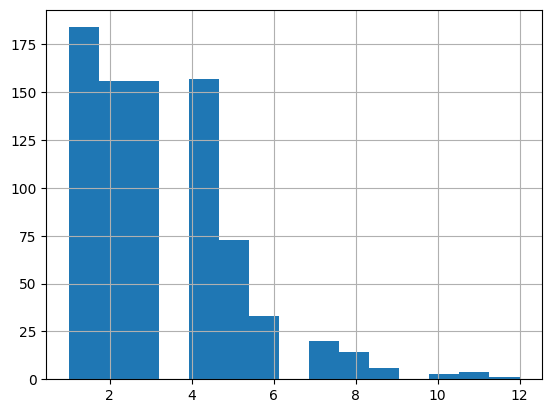

In [88]:
counties.hist(bins=15)

In [93]:
pd.to_numeric(pd.Series(['1', '2', '']), downcast='float').astype(pd.Int16Dtype())

0       1
1       2
2    <NA>
dtype: Int16

In [133]:
wind2 = nrel.local_wind_transform(wind)

________________________________________________________________________________
[Memory] Calling dbcp.transform.helpers._geocode_locality...
_geocode_locality(     raw_state_name combined_locality
194        Illinois     DeWitt County
195        Illinois     DeWitt County
253        Illinois     DeWitt County
254        Illinois     DeWitt County
409         Indiana  Koscuisko County
...             ...               ...
1674          Texas     Wichita Falls
1675          Texas             Wylie
1812        Wyoming    Notrona County
1813        Wyoming    Notrona County
1814        Wyoming    Notrona County

[103 rows x 2 columns], state_col='raw_state_name', locality_col='combined_locality')
_________________________________________________geocode_locality - 6.4s, 0.1min


In [129]:
solar2 = nrel.local_solar_transform(solar)

________________________________________________________________________________
[Memory] Calling dbcp.transform.helpers._geocode_locality...
_geocode_locality(    raw_state_name     combined_locality
40         Florida         Gadsen County
41         Florida         Gadsen County
42         Florida         Gadsen County
141       Illinois         DeWitt County
142       Illinois         DeWitt County
143       Illinois         DeWitt County
232        Indiana      Dearborne County
233        Indiana      Dearborne County
234        Indiana      Dearborne County
263        Indiana      Koscuisko County
264        Indiana      Koscuisko County
265        Indiana      Koscuisko County
266        Indiana      Koscuisko County
371       Maryland       Fredrick County
372       Maryland       Fredrick County
373       Maryland       Fredrick County
394..., state_col='raw_state_name', locality_col='combined_locality')
_________________________________________________geocode_locality - 3.1s,

In [134]:
wind2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   raw_state_name              1833 non-null   object 
 1   raw_town_name               105 non-null    object 
 2   raw_county_name             1736 non-null   object 
 3   raw_ordinance_type          1833 non-null   object 
 4   raw_units                   1778 non-null   object 
 5   raw_value                   1778 non-null   object 
 6   raw_citation                1833 non-null   object 
 7   raw_comment                 261 non-null    object 
 8   raw_updated_unit            12 non-null     object 
 9   raw_updated_value           11 non-null     float64
 10  raw_updated_comment         12 non-null     object 
 11  year_enacted                484 non-null    Int16  
 12  year_recorded               1816 non-null   Int16  
 13  updated_year_recorded       242 n

In [141]:
solar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   raw_state_name              838 non-null    object 
 1   raw_town_name               33 non-null     object 
 2   raw_county_name             812 non-null    object 
 3   raw_ordinance_type          838 non-null    object 
 4   raw_units                   836 non-null    object 
 5   raw_value                   834 non-null    object 
 6   raw_citation                838 non-null    object 
 7   raw_comment                 160 non-null    object 
 8   raw_updated_unit            0 non-null      float64
 9   raw_updated_value           0 non-null      float64
 10  raw_updated_comment         0 non-null      float64
 11  year_enacted                194 non-null    Int16  
 12  year_recorded               284 non-null    Int16  
 13  updated_year_recorded       0 non-n

In [164]:
out = nrel.transform(raw_solar | raw_wind)['nrel_local_ordinances']

In [165]:
out

,raw_state_name,raw_town_name,raw_county_name,raw_ordinance_type,raw_units,raw_value,raw_citation,raw_comment,raw_updated_unit,raw_updated_value,raw_updated_comment,year_enacted,year_recorded,updated_year_recorded,update_status,ordinance_type,units,value,energy_type,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
0,Alabama,NaN,Baldwin,Banned,NaN,NaN,Baldwin County Zoning Ordinance Sec. 13.13,NaN,NaN,NaN,NaN,<NA>,2018,<NA>,No Change,banned,NaN,NaN,wind,01,01003,Baldwin County,county,Baldwin County
1,Alabama,NaN,Cherokee,Sound,dBA,40,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,<NA>,2021,<NA>,NaN,sound,dba,40.000000,wind,01,01019,Cherokee County,county,Cherokee County
2,Alabama,NaN,Cherokee,Property Line,Meters,782,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,<NA>,2021,<NA>,NaN,property line,meters,782.000000,wind,01,01019,Cherokee County,county,Cherokee County
3,Alabama,NaN,Cherokee,Transmission,Max tip-height Multiplier,1.5,Ala. Code § 45-10-260.05,Minimum Setback of 1.5 the max height to an overhead electric line,NaN,NaN,NaN,<NA>,2021,<NA>,NaN,transmission,max tip height multiplier,1.500000,wind,01,01019,Cherokee County,county,Cherokee County
4,Alabama,NaN,Dekalb,Sound,dBA,40,Ala. Code § 45-25-260.05,NaN,NaN,NaN,NaN,<NA>,2021,<NA>,NaN,sound,dba,40.000000,wind,01,01049,Dekalb County,county,Dekalb County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Wyoming,NaN,Sheridan,Roads,Meters,60.96,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,roads,meters,60.959999,solar,56,56033,Sheridan County,county,Sheridan County
2667,Wyoming,NaN,Sheridan,Property Line,Meters,30.48,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,property line,meters,30.480000,solar,56,56033,Sheridan County,county,Sheridan County
2668,Wyoming,NaN,Sheridan,Height,Meters,4.572,RULES AND REGULATIONS GOVERNING THE PERMITING OF COMMERICIAL SOLAR ENERGY FACILITIES,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,height,meters,4.572000,solar,56,56033,Sheridan County,county,Sheridan County
2669,Wyoming,NaN,Sweetwater,Coverage,Percentage,10,Sec 11. Solar Energy System – On-Site,coverage cannot exceed 10 % of the lot,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,maximum lot coverage,percentage,10.000000,solar,56,56037,Sweetwater County,county,Sweetwater County


In [171]:
list(out.columns)

['raw_state_name',
 'raw_town_name',
 'raw_county_name',
 'raw_ordinance_type',
 'raw_units',
 'raw_value',
 'raw_citation',
 'raw_comment',
 'raw_updated_unit',
 'raw_updated_value',
 'raw_updated_comment',
 'year_enacted',
 'year_recorded',
 'updated_year_recorded',
 'update_status',
 'ordinance_type',
 'units',
 'value',
 'energy_type',
 'state_id_fips',
 'county_id_fips',
 'geocoded_locality_name',
 'geocoded_locality_type',
 'geocoded_containing_county']

In [172]:
col_order = [
    'county_id_fips',
    'raw_state_name',
    'raw_town_name',
    'raw_county_name',
    'geocoded_locality_type',
    'energy_type',
    'ordinance_type',
    'units',
    'value',
    'raw_comment',
    'geocoded_locality_name',
    'geocoded_containing_county',
    'raw_ordinance_type',
    'raw_units',
    'raw_value',
    'raw_updated_unit',
    'raw_updated_value',
    'raw_updated_comment',
    'year_enacted',
    'year_recorded',
    'updated_year_recorded',
    'update_status',
    'state_id_fips',
    'raw_citation',
]

In [173]:
out = out.loc[:, col_order]

In [183]:
out.groupby('county_id_fips').size().value_counts(sort=False).sort_index()

1     101
2     102
3     127
4     137
5      90
6      45
7      37
8      18
9      12
10      6
11      5
12      5
14      1
17      1
dtype: int64

In [184]:
out.groupby(['state_id_fips', 'geocoded_locality_name']).size().value_counts(sort=False).sort_index()

1     114
2     103
3     128
4     143
5      91
6      50
7      35
8      17
9      12
10      6
11      5
12      3
dtype: int64

In [185]:
out.groupby(['state_id_fips', 'geocoded_locality_name']).size().nlargest(5)

state_id_fips  geocoded_locality_name
18             Clinton County            12
49             Duchesne County           12
               Iron County               12
17             Kankakee County           11
18             Jay County                11
dtype: int64

In [168]:
out.groupby('county_id_fips').size().nlargest(5)

county_id_fips
36029    17
36101    14
18023    12
36013    12
36049    12
dtype: int64

In [174]:
out.loc[out['county_id_fips'].eq('36029'), :]

,county_id_fips,raw_state_name,raw_town_name,raw_county_name,geocoded_locality_type,energy_type,ordinance_type,units,value,raw_comment,geocoded_locality_name,geocoded_containing_county,raw_ordinance_type,raw_units,raw_value,raw_updated_unit,raw_updated_value,raw_updated_comment,year_enacted,year_recorded,updated_year_recorded,update_status,state_id_fips,raw_citation
1249,36029,New York,Evans Town,NaN,town,wind,structures,max tip height multiplier,1.500000,NaN,Evans,Erie County,Structures,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1250,36029,New York,Evans Town,NaN,town,wind,property line,meters,304.799988,NaN,Evans,Erie County,Property Line,Meters,304.8,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1251,36029,New York,Evans Town,NaN,town,wind,railroads,max tip height multiplier,1.500000,NaN,Evans,Erie County,Railroads,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1252,36029,New York,Evans Town,NaN,town,wind,transmission,max tip height multiplier,1.500000,NaN,Evans,Erie County,Transmission,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1253,36029,New York,Evans Town,NaN,town,wind,height,meters,137.160004,NaN,Evans,Erie County,Height,Meters,137.16,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1254,36029,New York,Evans Town,NaN,town,wind,sound,dba,50.000000,NaN,Evans,Erie County,Sound,dBA,50,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Evans Town Zoning Chapter 198 wind energy conversion systems
1259,36029,New York,Hamburg Town,NaN,city,wind,property line,max tip height multiplier,1.500000,NaN,Hamburg,Erie County,Property Line,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Town of Hamburg Zoning Art L WECS
1260,36029,New York,Hamburg Town,NaN,city,wind,structures,max tip height multiplier,1.500000,NaN,Hamburg,Erie County,Structures,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Town of Hamburg Zoning Art L WECS
1261,36029,New York,Hamburg Town,NaN,city,wind,roads,max tip height multiplier,1.500000,NaN,Hamburg,Erie County,Roads,Max tip-height Multiplier,1.5,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Town of Hamburg Zoning Art L WECS
1262,36029,New York,Hamburg Town,NaN,city,wind,minimum lot size,acres,2.000000,An additional two acres shall be required for each additional tower.,Hamburg,Erie County,Minimum Lot Size,Acres,2,NaN,NaN,NaN,<NA>,2022,<NA>,NaN,36,Town of Hamburg Zoning Art L WECS


In [187]:
out.loc[out['energy_type'].eq('wind'), ['energy_type', 'ordinance_type', 'units']].value_counts(dropna=False).sort_index()

energy_type  ordinance_type         units                    
wind         appalachian trail      meters                         1
             banned                 NaN                           55
             density                acres                          1
                                    max tip height multiplier     17
                                    meters                         5
                                    minimum lot size               1
                                    rotor diameter multiplier      9
                                    turbines                       1
             height                 meters                        91
             highways               max tip height multiplier      5
                                    meters                         4
             maximum capacity       kw                             2
             minimum lot size       acres                         22
             oil & gas pipelines    max t